In [74]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_moons

In [75]:
np.random.seed(42)

This neural network has one hidden layer with 'n' number of neurons and have a single output neuron.

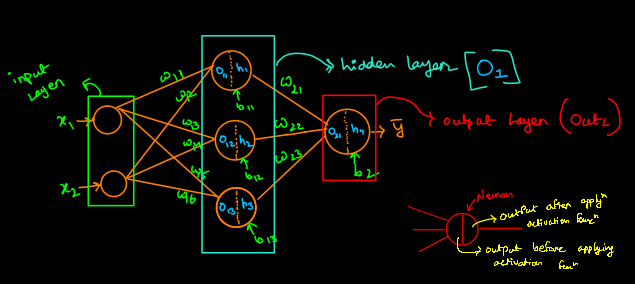

Forward Propagation:

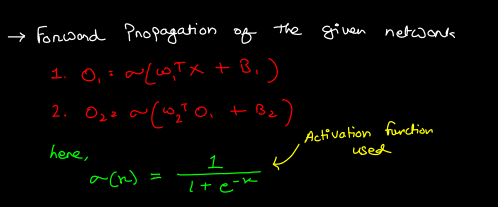

now we will se how to update the weights using backpropagation, in simpler way we will use the following way to update it

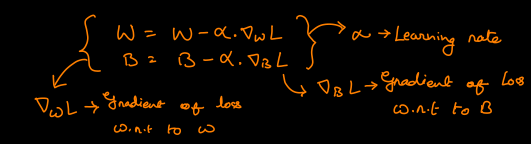

For the understanding purpose , the loss function used here is mean-squared error.

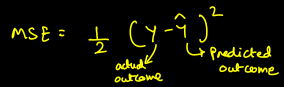

We will start updating the weights and the biases from the last layer, so at first we will update w21,w22,w23 and b2. Following is the way to find the partial derivative of the loss function with the weights. For understanding, only calculation of w21 is given below, refer to the attached for more details.

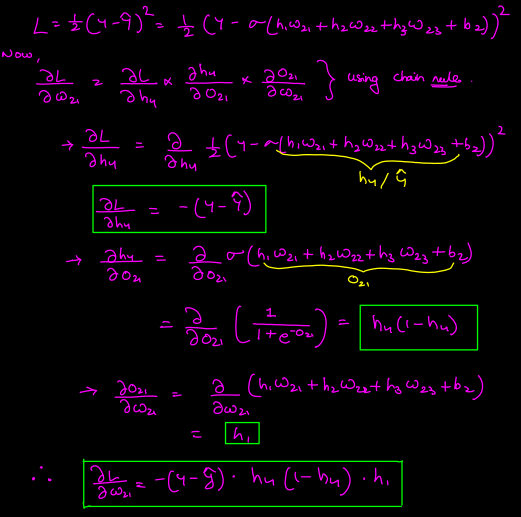

now we will see the update rule and derivation of gradient of prev layer weights.

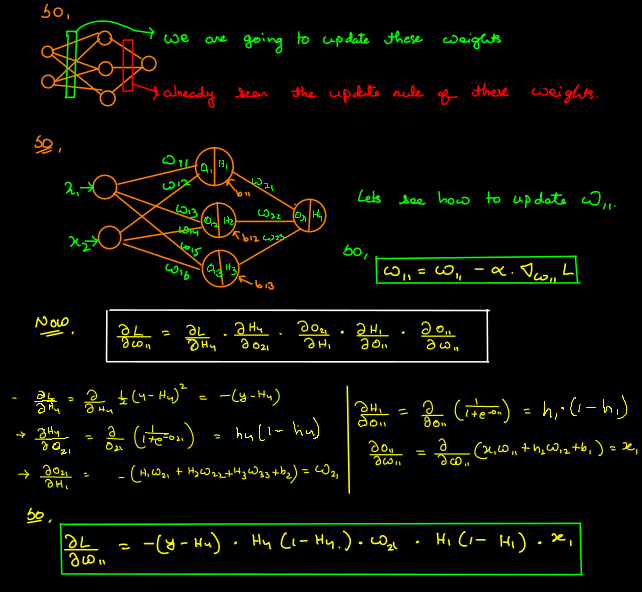

Once we get the gradients of all the weights and biases, we will use the above mentioned weights update rule to update the weights and biases

In [94]:
class Neural_net:

    def __init__(self,epochs,input_neuron,n_neurons,alpha):
        self.epochs = epochs
        self.input_neurons = input_neuron
        self.n_neurons = n_neurons
        self.alpha = alpha
        self.sgd_loss = []
        self.gd_loss = []

    def init_para(self):
        self.W1 = np.random.randn(self.input_neurons,self.n_neurons)
        self.B1 = np.random.randn(self.n_neurons,1)
        self.W2 = np.random.randn(self.n_neurons,1)
        self.B2 = np.random.randn(1,1)

    def sig(self,x):
        return 1/(1+np.exp(-x))

    def hypothesis(self,data,weights,bias):
        return np.dot(data,weights) + bias.T

    def feed_forward(self,data):
        self.o1 = self.hypothesis(data,self.W1,self.B1)
        self.H1 = self.sig(self.o1)
        self.o2 = self.hypothesis(self.H1,self.W2,self.B2)
        self.H2 = self.sig(self.o2)
        return self.H2

    def loss_func(self,label,predicted):
        return np.sum(np.square(label-predicted))

    def cross_entropy(self,label,predicted):
        l = -(1/len(label))*np.sum(label*np.log(predicted) + (1-label)*np.log(1-predicted))
        return l

    def SGD(self,error,data):
        error_f = error * self.H2 *(1-self.H2)

        grad_w2_f = np.dot(error_f,self.H1)
        grad_b2_f = error_f

        p1 = np.dot(error_f,self.W2.T)
        p2 = np.multiply(np.multiply(p1,self.H1),(1-self.H1))
        grad_w1_f = np.dot(p2.T,data)
        grad_b1_f = p2
        return grad_w2_f,grad_b2_f,grad_w1_f,grad_b1_f

    def train_sgd(self,train_data,train_label):
        self.init_para()
        losses = []
        for i in range(self.epochs):
            l = []
            for j in range(len(train_data)):
                data = np.expand_dims(train_data[j],axis=0)
                h2 = self.feed_forward(data)
                loss_val = self.loss_func(train_label[j],h2)
                error = h2-train_label[j]
                l.append(loss_val)
                grad_w2_f,grad_b2_f,grad_w1_f,grad_b1_f = self.SGD(error,data)

                self.W2 -= self.alpha * grad_w2_f.T
                self.W1 -= self.alpha * grad_w1_f.T
                self.B2 -= self.alpha * grad_b2_f
                self.B1 -= self.alpha * grad_b1_f.T
            if (i+1)%100 == 0:
                print('epoch = {}, loss = {}'.format(i+1,self.sgd_loss[-1]))
            self.sgd_loss.append(sum(l)/len(train_data))

    def gradient(self,error,data):

        delta2 = error * self.H2 * (1-self.H2)
        grad_w2 = np.dot(delta2.T,self.H1)
        grad_b2 = np.mean(delta2,axis=0,keepdims=True)
        delta1 = np.dot(delta2,self.W2.T) * self.H1 * (1-self.H1)
        grad_w1 = np.dot(delta1.T,data)
        grad_b1 = np.mean(delta1,axis=0,keepdims=True)

        return grad_w2,grad_b2,grad_w1,grad_b1

    def train_bgd(self,train_data,train_label):
        self.init_para()
        for i in range(self.epochs):
            h2 = self.feed_forward(train_data)
            # loss_val = self.cross_entropy(train_label,h2)
            loss_val = np.mean(np.square(h2-train_label))
            error = h2-train_label
            self.gd_loss.append(loss_val)
            if (i+1)%1000 == 0:
                print('epoch = {}, loss = {}'.format(i+1,loss_val))

            grad_w2_f,grad_b2_f,grad_w1_f,grad_b1_f = self.gradient(error,train_data)
            self.W2 -= self.alpha * grad_w2_f.T
            self.W1 -= self.alpha * grad_w1_f.T
            self.B1 -= self.alpha * grad_b1_f.T
            self.B2 -= self.alpha * grad_b2_f

    def predict(self,data):
        output = nn.feed_forward(data)
        return output

In [77]:
class Dataset:
    def __init__(self,bits):
        self.bits = bits
        self.possible = 2**bits
        self.data = []
        self.label = []
        self.train_data = []
        self.test_data = []
        self.train_label = []
        self.test_label = []

    def create_data(self):
        for i in range(self.possible):
            b = bin(i).replace('0b','')
            d = (self.bits-len(b))*'0' + b
            data = [int(i) for i in d]
            res = 0
            for i in data:
                res = res ^ i
            self.data.append(data)
            self.label.append(res)
        shuffle = list(zip(self.data,self.label))
        random.shuffle(shuffle)
        self.data,self.label = zip(*shuffle)
        boundary = int(len(self.data)*0.8)
        self.train_data = self.data[0:boundary]
        self.train_label = self.label[0:boundary]
        self.test_data = self.data[boundary:]
        self.test_label = self.label[boundary:]
        return np.array(self.train_data),np.array(self.train_label),np.array(self.test_data),np.array(self.test_label)


In [95]:
input_neurons = 5
train_data,train_label,test_data,test_label = Dataset(input_neurons).create_data()
train_label = train_label.reshape(-1,1)
test_label = test_label.reshape(-1,1)

In [130]:
nn = Neural_net(5000,input_neurons,40,0.1)

In [131]:
nn.train_bgd(train_data,train_label)

epoch = 1000, loss = 0.02849196811333323
epoch = 2000, loss = 0.004905321420122205
epoch = 3000, loss = 0.002108392268481576
epoch = 4000, loss = 0.0012573079641164696
epoch = 5000, loss = 0.0008713263858160885


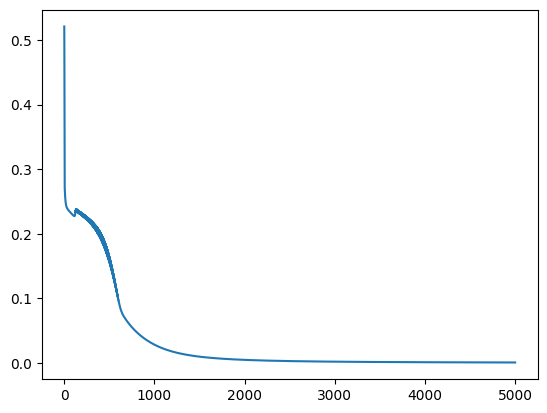

In [132]:
plt.plot(nn.gd_loss)

In [133]:
pred = []
for i in nn.feed_forward(test_data):
    if i > 0.5:
        pred.append(0)
    else:
        pred.append(1)
pred = np.array(pred)

In [135]:
for i in range(len(test_data)):
    print(test_data[i], '=> ',pred[i])

[1 1 1 1 1] =>  1
[0 1 0 0 0] =>  1
[0 0 1 1 1] =>  1
[0 1 0 1 1] =>  1
[0 1 0 1 0] =>  0
[1 0 0 1 1] =>  1
[0 0 0 1 1] =>  1


Lets try the same neural network architecture to classify the classes of the following

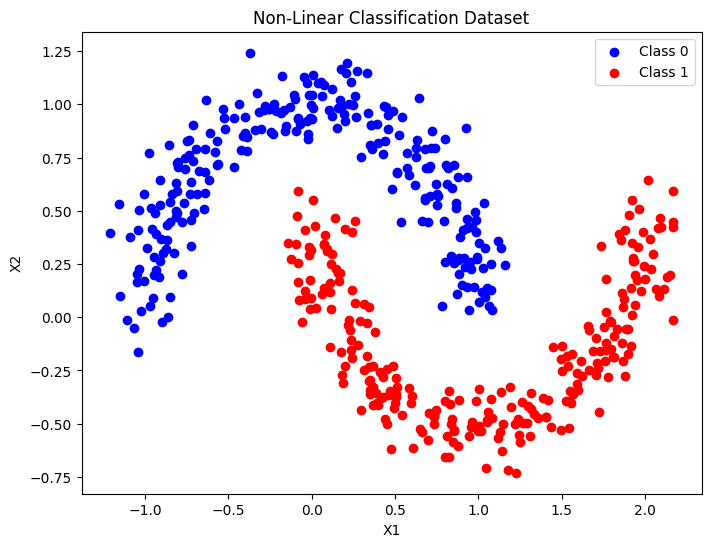

In [136]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Non-Linear Classification Dataset')
plt.legend()
plt.show()


In [137]:
train_data = X[:int(0.8*len(X)),:]
train_label = y[:int(0.8*len(X))]
test_data = X[int(0.8*len(X)):,:]
test_label = y[int(0.8*len(X)):]
input_neurons = train_data.shape[1]

In [138]:
nn = Neural_net(1000,input_neurons,20,0.1)

In [139]:
nn.train_bgd(train_data,train_label.reshape(-1,1))

epoch = 1000, loss = 0.00285748590297242


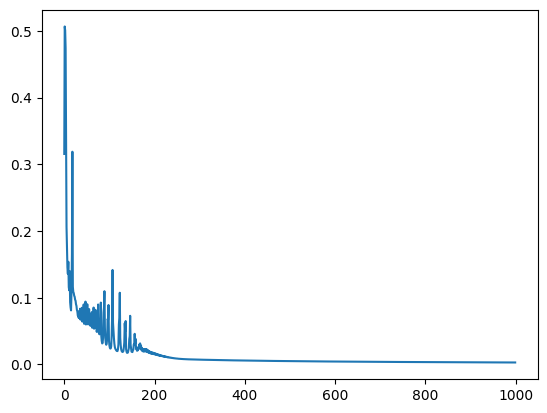

In [140]:
plt.plot(nn.gd_loss)

In [141]:
pred = []
for i in nn.feed_forward(test_data):
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)
pred = np.array(pred)

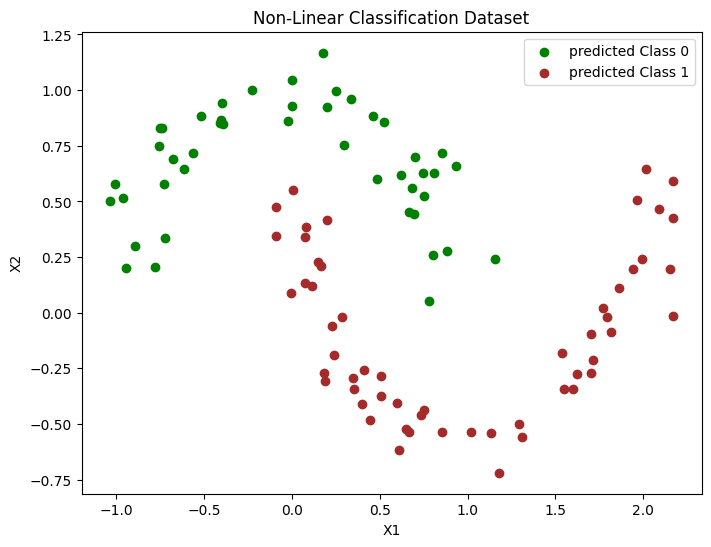

In [142]:
plt.figure(figsize=(8, 6))
plt.scatter(test_data[pred == 0][:, 0], test_data[pred == 0][:, 1], color='green', label='predicted Class 0')
plt.scatter(test_data[pred == 1][:, 0], test_data[pred == 1][:, 1], color='brown', label='predicted Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Non-Linear Classification Dataset')
plt.legend()
plt.show()

In [143]:
# plotting the decision boundary

x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

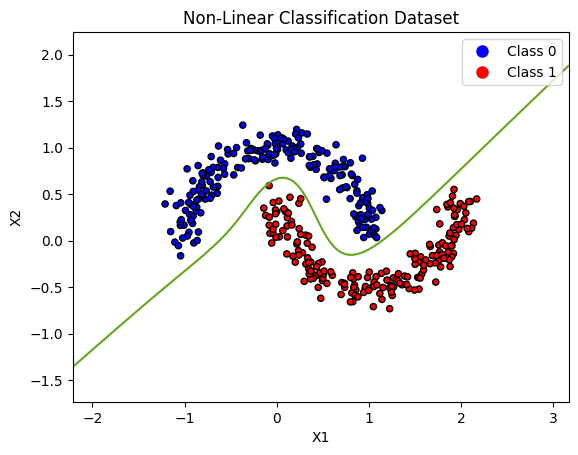

In [144]:
Z = nn.feed_forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label, cmap=plt.cm.bwr, edgecolors='k', s=20)
plt.title("Non-Linear Classification Dataset")

plt.contour(xx, yy, Z, levels=[0.5], cmap="Dark2", vmin=0, vmax=1)

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1')],
           loc='best')
plt.show()